In [40]:
import gpjax as gpx
import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import optax as ox
import distrax as dx
import typing as tp
import jax.scipy.linalg as jsl

In [3]:
def plot_pdf(x: jnp.DeviceArray, dist: dx.Distribution) -> jnp.DeviceArray:
    return dist.prob(x)

In [ ]:
def barycentre(dists: tp.List[dx.Distribution], weights: jnp.ndarray) -> dx.Distribution:
    means = jnp.stack([d.mean() for d in dists])
    variances = jnp.stack([d.variance() for d in dists])
    barycentre_mean = jnp.multiply(means, weights)
    barycentre_mean = barycentre_mean.squeeze()
    barycentre_mean = jnp.sum(barycentre_mean, axis = -1 , keepdims = True)

    gaussian_vars = variances.squeeze()
    barycentre_var = jnp.multiply(weights, jnp.sqrt(gaussian_vars))
    barycentre_var = jnp.square(jnp.sum(barycentre_var))
    return dx.Normal(barycentre_mean, jnp.sqrt(barycentre_var))

(4.425, 17.075, -0.07978589264722863, 1.675503745591801)

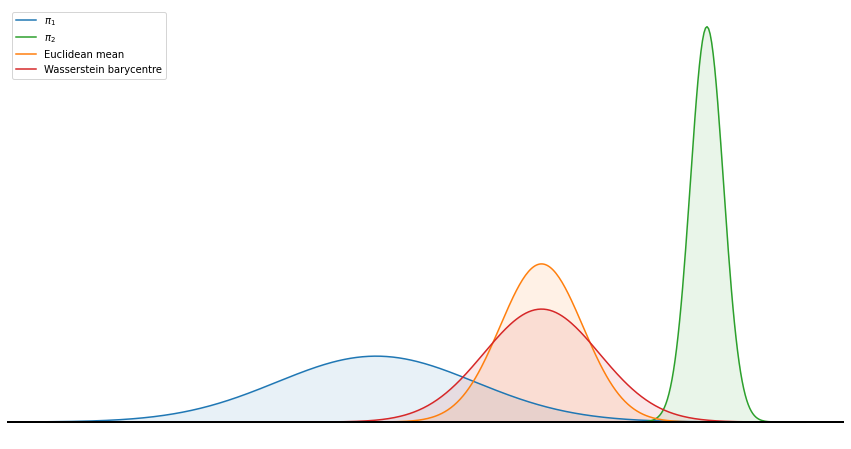

In [58]:
d1 = dx.Normal(loc = 10., scale=1.5)
d2 = dx.Normal(loc = 15., scale=0.25)


x = jnp.linspace(5., 16.5, 500)
pdf1 = plot_pdf(x, d1)
pdf2 = plot_pdf(x, d2)

euclidean_mean = jnp.mean(jnp.array([d1.mean(), d2.mean()]))
euclidean_scale = jnp.std(jnp.array([d1.scale, d2.scale]))
euclidean_dist = dx.Normal(loc=euclidean_mean, scale=euclidean_scale)
euclidean_pdf = plot_pdf(x, euclidean_dist)

wass_bary =barycentre([d1, d2], jnp.array([0.5, 0.5]))
wass_pdf = plot_pdf(x, wass_bary)

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(x, pdf1, label=r'$\pi_1$', color='tab:blue')
ax.plot(x, pdf2, label=r'$\pi_2$', color='tab:green')
ax.plot(x, euclidean_pdf, label='Euclidean mean', color='tab:orange')
ax.plot(x, wass_pdf, label='Wasserstein barycentre', color='tab:red')

ax.fill_between(x, jnp.zeros_like(pdf1), pdf1, color='tab:blue', alpha=0.1)
ax.fill_between(x, jnp.zeros_like(pdf2), pdf2, color='tab:green', alpha=0.1)
ax.fill_between(x, jnp.zeros_like(euclidean_pdf), euclidean_pdf, color='tab:orange', alpha=0.1)
ax.fill_between(x, jnp.zeros_like(wass_pdf), wass_pdf, color='tab:red', alpha=0.1)
ax.legend(loc='best')
ax.axhline(y=0., color='black', linewidth=2)
ax.axis('off')

(4.425, 17.075, -0.07978589264722863, 1.675503745591801)

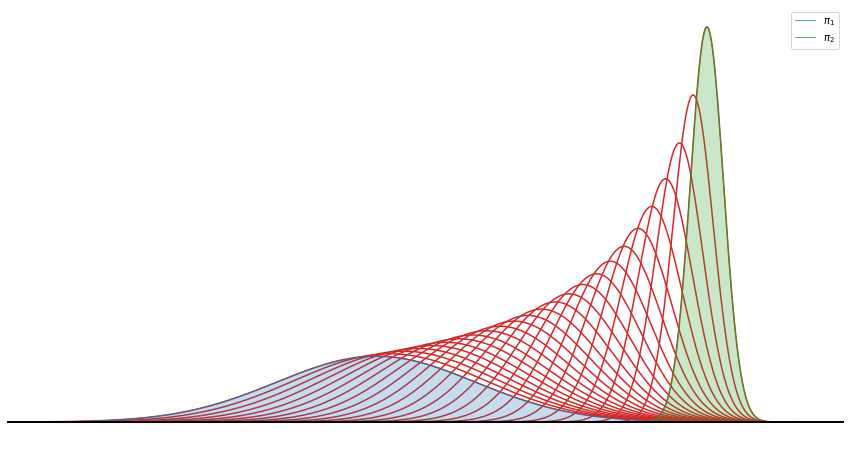

In [56]:
import ot

pdfs = []
for weight in jnp.linspace(0., 1., 25):
    alpha = weight 
    beta = 1. - weight
    weights = jnp.array([alpha, beta])
    wass_bary = barycentre([d1, d2], weights)
    pdfs.append(plot_pdf(x, wass_bary))

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(x, pdf1, label=r'$\pi_1$', color='tab:blue', linewidth=0.75, zorder=2)
ax.plot(x, pdf2, label=r'$\pi_2$', color='tab:green', linewidth=0.75, zorder=2)
ax.fill_between(x, jnp.zeros_like(pdf1), pdf1, color='tab:blue', alpha=0.25, zorder=2)
ax.fill_between(x, jnp.zeros_like(pdf2), pdf2, color='tab:green', alpha=0.25, zorder=2)

for pdf in pdfs:
    ax.plot(x, pdf, color='tab:red', zorder=1)
    # ax.fill_between(x, jnp.zeros_like(pdf), pdf, color='tab:red', alpha=0.02, zorder=1)
ax.legend(loc='best')
ax.axhline(y=0., color='black', linewidth=2)
ax.axis('off')

DeviceArray(1.5, dtype=float64, weak_type=True)